# w209 Data Viz - EDA

In [1]:
import pandas as pd
import numpy as np
import requests as req
from IPython.display import Image


## Download Data

In [ ]:
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [ ]:
for state in state_list:
    file_name = state + "-2015.zip"
    print("Downloading " + file_name + "...")
    request_url = "https://s3-us-gov-west-1.amazonaws.com/cg-d3f0433b-a53e-4934-8b94-c678aa2cbaf3/2015/" + file_name
    res = req.get(request_url)
    open("2015/" + file_name, 'wb').write(res.content)
print("--Finished downloading--")

## Data EDA and Munging

In [2]:
df_crime_stats = pd.read_csv('ucr_clean.csv')

In [3]:
df_crime_stats

,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition,rape_legacy_definition,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,state
0,boulder city,15661.0,19.0,0.0,1.0,NaN,6.0,12.0,164.0,60.0,91.0,13.0,4.0,nevada
1,carlin,2291.0,19.0,0.0,0.0,NaN,0.0,19.0,25.0,16.0,6.0,3.0,0.0,nevada
2,elko,20687.0,102.0,2.0,38.0,NaN,8.0,54.0,596.0,144.0,395.0,57.0,0.0,nevada
3,fallon,8433.0,17.0,0.0,0.0,NaN,2.0,15.0,230.0,13.0,208.0,9.0,0.0,nevada
4,henderson,291584.0,617.0,10.0,94.0,NaN,235.0,278.0,5484.0,1237.0,3617.0,630.0,19.0,nevada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,skagway,1075.0,4.0,0.0,0.0,NaN,0.0,4.0,10.0,1.0,9.0,0.0,0.0,alaska
9569,soldotna,4619.0,34.0,0.0,4.0,NaN,5.0,25.0,235.0,14.0,212.0,9.0,2.0,alaska
9570,unalaska,4517.0,16.0,0.0,1.0,NaN,0.0,15.0,29.0,5.0,15.0,9.0,0.0,alaska
9571,valdez,3847.0,7.0,0.0,2.0,NaN,0.0,5.0,63.0,7.0,52.0,4.0,1.0,alaska


### No Conflicts in Rape Number Reporting

In [ ]:
df_crime_stats[df_crime_stats['rape_legacy_definition'].notna() & df_crime_stats['rape_revised_definition'].notna()]

### All 50 States Represented

In [ ]:
states = df_crime_stats['state'].unique()
states = states.tolist()
assert len(states) == 50

### East Coast / West Coast Definitions

In [ ]:
!ls

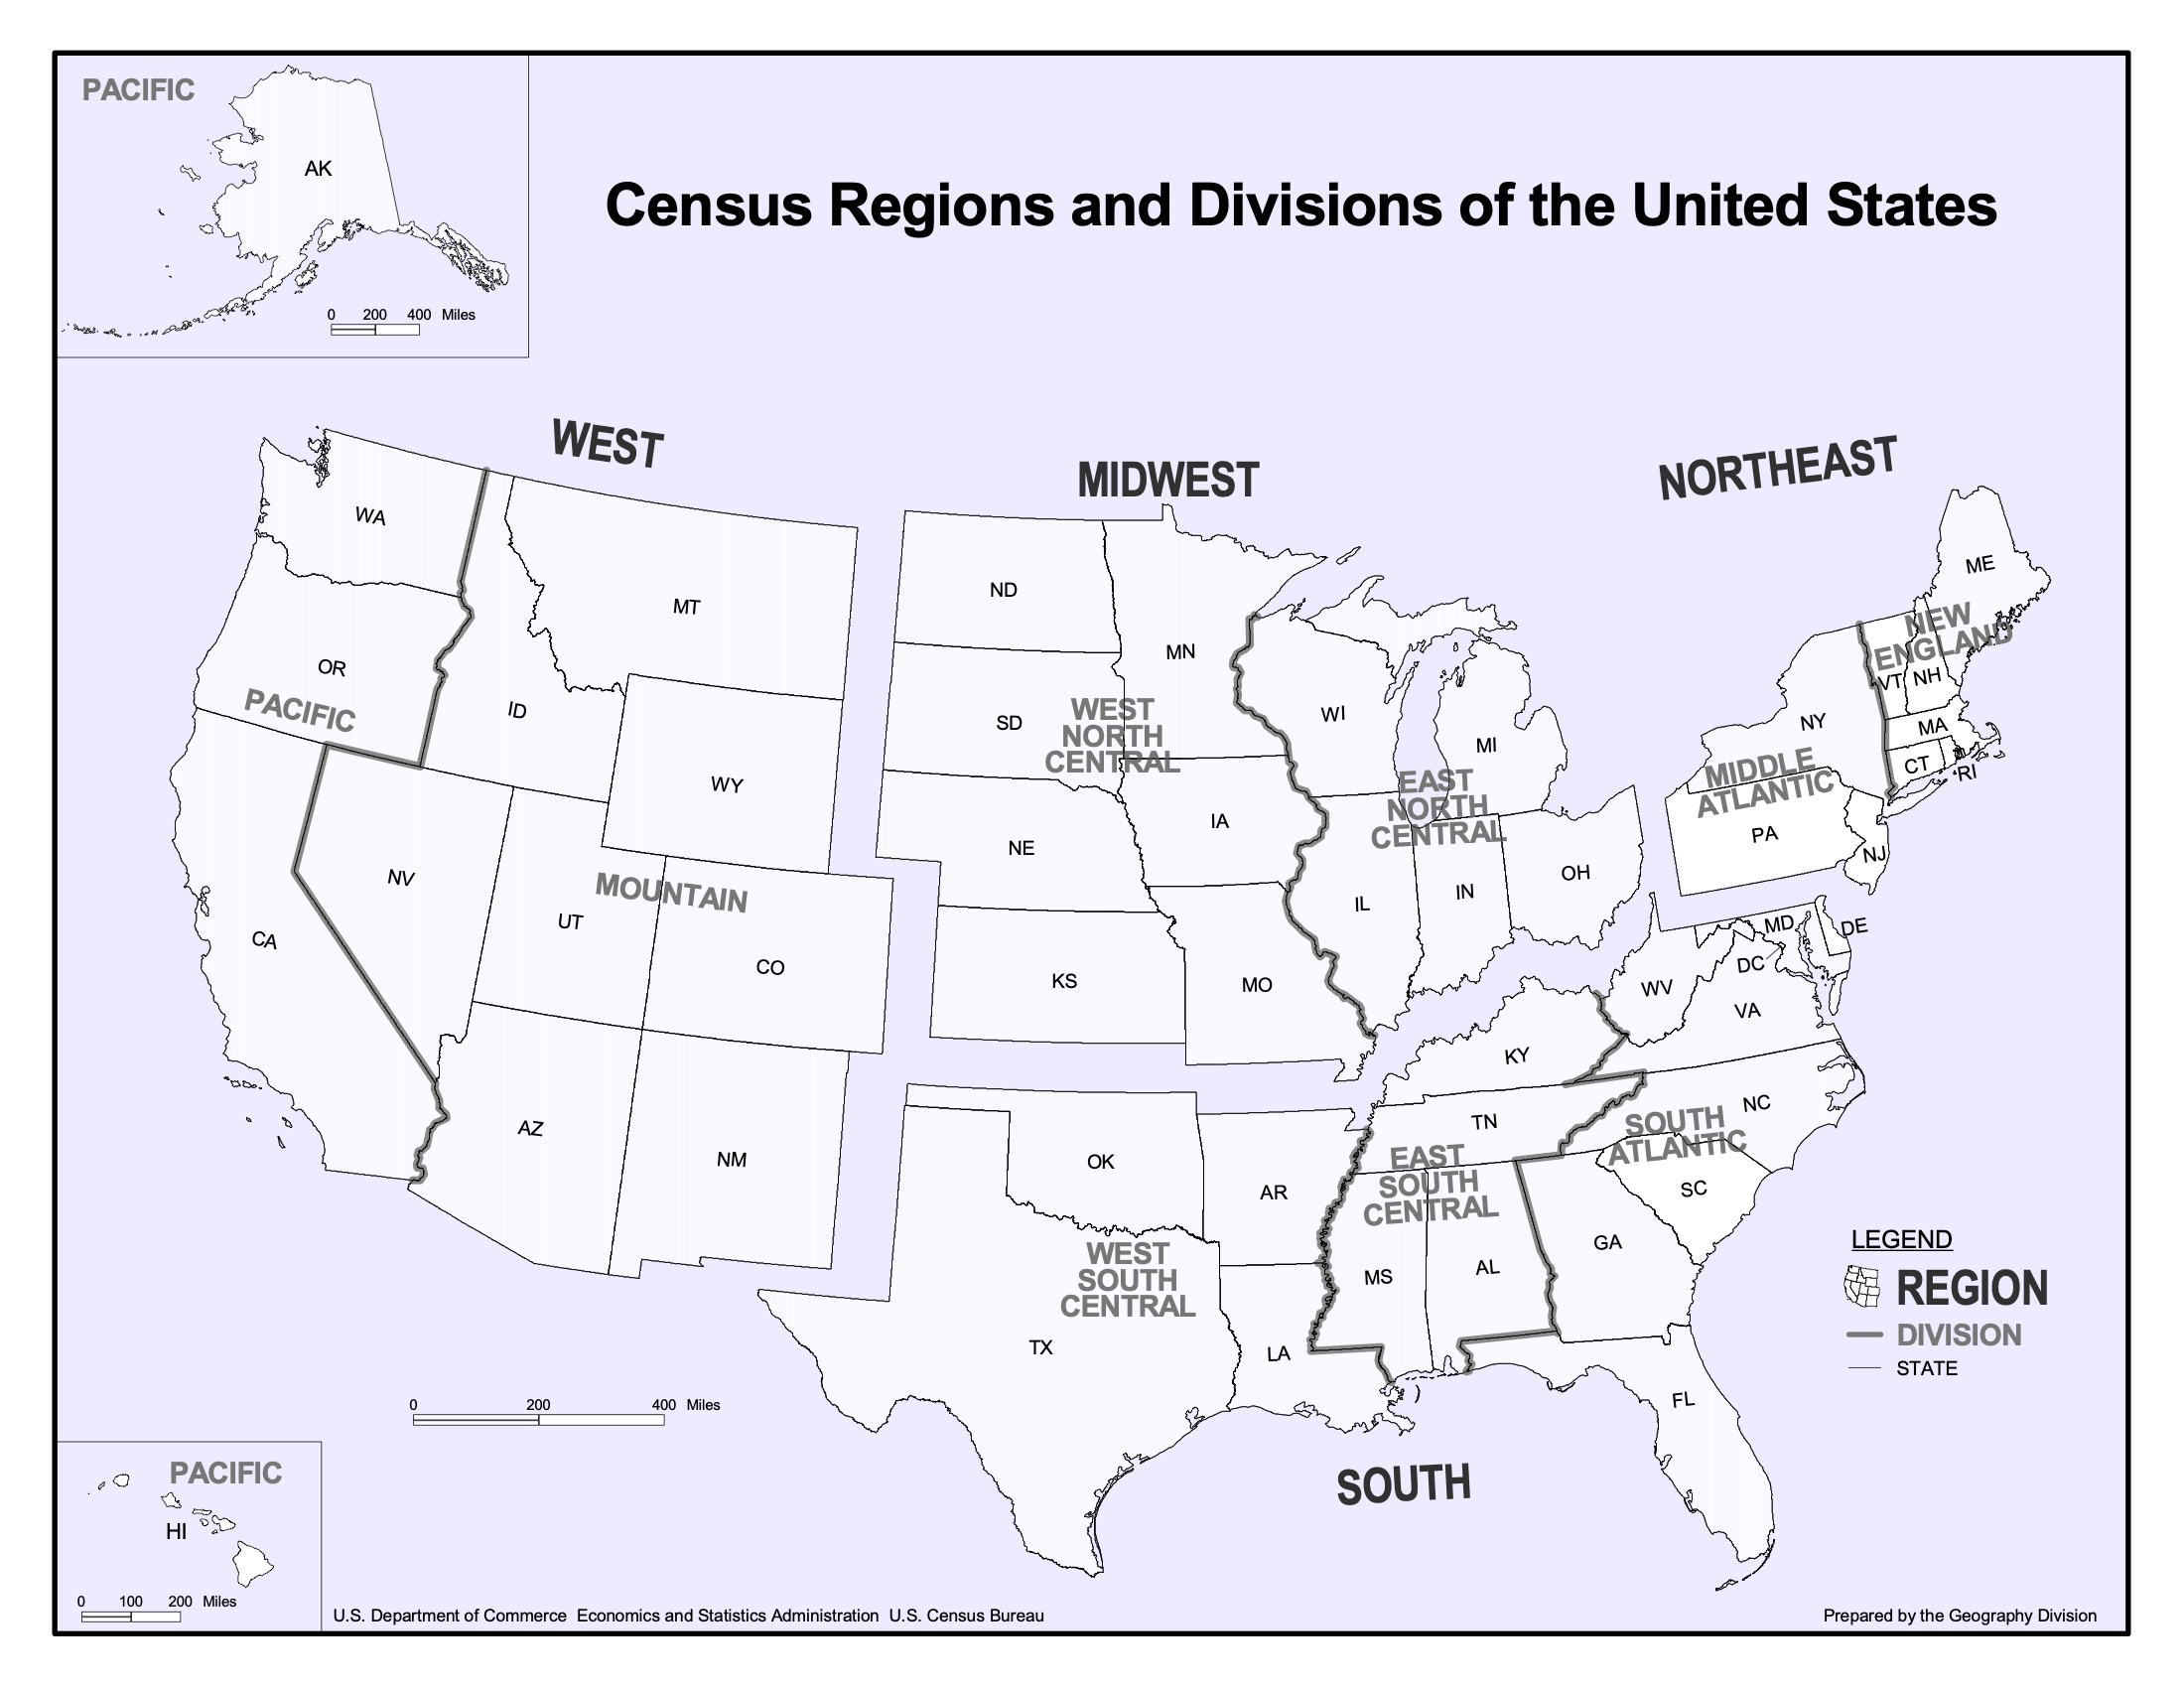

In [4]:
census_map = Image(filename='us_regdiv_map.jpg',width = 550, height = 425) 
census_map

### Total Crime Stats

In [5]:
df_crime_stats = df_crime_stats.fillna(0)

In [6]:
df_crime_stats["total_crime"] = df_crime_stats["violent_crime"] \
+ df_crime_stats["murder_and_nonnegligent_manslaughter"] \
+ df_crime_stats["rape_revised_definition"] \
+ df_crime_stats["rape_legacy_definition"] \
+ df_crime_stats["robbery"] \
+ df_crime_stats["aggravated_assault"] \
+ df_crime_stats["property_crime"] \
+ df_crime_stats["burglary"] \
+ df_crime_stats["larceny_theft"] \
+ df_crime_stats["motor_vehicle_theft"] \
+ df_crime_stats["arson"]

In [8]:
df_crime_stats.to_csv('crime_summary.csv')

In [ ]:
df_cities_by_state = df_crime_stats.groupby('state').sum()
df_cities_by_state

In [ ]:
df_data_107 = pd.read_csv('Data10_7_2022.csv')